In [1]:
import pandas as pd
import numpy as np
import chess_analyzer as chan

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

import datetime

# Define absolute data directory path
DATA_DIR = Path('/home/roman/python/kotelok/chess_evaluater/data')

# best view options
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)


In [2]:
current_user_name = 'Rosolimo'

today = datetime.datetime.now()
week_ago = today - datetime.timedelta(days=7)
month_ago = today - datetime.timedelta(days=30)
year_ago = today - datetime.timedelta(days=365)

date_start = year_ago.strftime("%Y-%m-%d")
date_finish = today.strftime("%Y-%m-%d")

In [5]:
# Option 1: Load existing analysis files (api=0, default)
# Use this if you already have CSV files in data/games_analysis
# anl_res_df = chan.get_analysys_results(date_start, date_finish, is_verbose=False)

# Option 2: Download NEW data from API and analyze it (api=1)
# This will:
#   1. Download all games from chess.com API for the date range
#   2. Analyze them with Stockfish
#   3. Load the analysis results
anl_res_df = chan.get_analysys_results(
    date_start, 
    date_finish, 
    is_verbose=False,  # Set to True to see progress
    api=1,  # Set to 1 to download and analyze new data
    user_name=current_user_name,  # Required when api=1
    engine_path=None,  # Will auto-detect Stockfish
    depth=10  # Analysis depth
)

work_df = chan.make_user_df(anl_res_df)

In [6]:
work_df.sample(3)

,game_id,game_end_time,color,player,opponent,result,opponent_result,points,opponent_points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated,url,game_phase,move_number,full_move,move_san,evaluation,evaluation_pawns,eval_change,move_type,time_remaining,opponent_time_remaining,time_used,opponent_time_used,is_same_material_kind,material,opponent_material,material_balance,is_capture,is_promotion,pawns,opponent_pawns,isolated_pawns,opponent_isolated_pawns,doubled_pawns,opponent_doubled_pawns,passed_pawns,opponent_passed_pawns,center_control,opponent_center_control,castled,opponent_castled,captures,opponent_captures,promotions,opponent_promotions,evaluation_pawns_relative,evaluation_pawns_group,evaluation_pawns_relative_group,date,week
55867,140295919962,2025-07-03 22:20:53,White,Esneyder13,Rosolimo,win,resigned,1.0,0.0,1669,1744,-75,180+2,blitz,chess,True,https://www.chess.com/game/live/140295919962,endgame,97,49,Ke4,264,2.64,-0.02,normal,44.6,52.5,233.4,223.5,False,13,14,-1,False,False,5,4,1,2,0,0,0,0,5,1,False,False,9,8,0,0,2.64,3,3,2025-07-03,2025-06-30
84759,143316565702,2025-09-19 19:59:19,Black,Rosolimo,Matthias123457,checkmated,win,0.0,1.0,1737,1706,31,180+2,blitz,chess,True,https://www.chess.com/game/live/143316565702,middlegame,32,16,a6,-707,-7.07,-0.31,normal,165.4,184.1,46.6,27.9,False,22,19,3,False,False,6,5,0,0,0,0,1,0,3,2,True,False,6,5,0,0,7.07,7,7,2025-09-19,2025-09-15
7718,130095534639,2025-01-08 20:21:35,White,Rosolimo,Lord_Vasel,timeout,win,0.0,1.0,1635,1587,48,180+2,blitz,chess,True,https://www.chess.com/game/live/130095534639,opening,19,10,Ne4,-79,-0.79,-1.59,mistake,158.0,185.0,42.0,13.0,False,37,38,-1,False,False,6,7,1,3,0,1,0,0,3,4,False,False,1,2,0,0,-0.79,-1,-1,2025-01-08,2025-01-06


In [7]:
week_stat_df = chan.get_player_stat(
                                    work_df[
                                        (work_df['game_end_time'] >= week_ago) &
                                        (work_df['game_end_time'] <= today)
                                        ], 
                                    fields=['color']
                                    )

month_stat_df = chan.get_player_stat(
                                    work_df[
                                        (work_df['game_end_time'] >= month_ago) &
                                        (work_df['game_end_time'] <= today)
                                        ], 
                                    fields=['color']
                                    )

year_stat_df = chan.get_player_stat(
                                    work_df[
                                        (work_df['game_end_time'] >= year_ago) &
                                        (work_df['game_end_time'] <= today)
                                        ], 
                                    fields=['color']
                                    )

In [9]:
year_stat_df[year_stat_df['player'] == current_user_name]

,player,color,games,moves,winrate,rating,opponent_rating,accur,accur_opponent,xG,time_used_avg,time_remaining_avg,good_moves,normal_moves,inaccuracy_moves,mistake_moves,blunder_moves,last_eval,rating_difference,moves_per_game
564,Rosolimo,Black,731,28418,0.459644,1684.924761,1678.224350,0.654594,0.674470,-0.019876,179.763338,134.735371,0.024738,0.612394,0.143430,0.107643,0.111795,-9.242257,6.700410,38.875513
565,Rosolimo,White,736,29602,0.474185,1684.319293,1675.684783,0.663945,0.669426,-0.005481,185.454348,133.023852,0.025674,0.597561,0.148166,0.116039,0.112560,-3.926087,8.634511,40.220109


In [10]:
month_stat_df[month_stat_df['player'] == current_user_name]

,player,color,games,moves,winrate,rating,opponent_rating,accur,accur_opponent,xG,time_used_avg,time_remaining_avg,good_moves,normal_moves,inaccuracy_moves,mistake_moves,blunder_moves,last_eval,rating_difference,moves_per_game
32,Rosolimo,Black,44,1770,0.477273,1632.477273,1572.431818,0.649026,0.656903,-0.007877,165.577273,140.719615,0.024294,0.623729,0.137288,0.112994,0.101695,-3.678636,60.045455,40.227273
33,Rosolimo,White,47,1858,0.468085,1632.425532,1599.893617,0.689855,0.687065,0.002790,168.278723,142.000497,0.024220,0.613025,0.146394,0.114101,0.102260,-6.225957,32.531915,39.531915


In [11]:
week_stat_df[week_stat_df['player'] == current_user_name]

,player,color,games,moves,winrate,rating,opponent_rating,accur,accur_opponent,xG,time_used_avg,time_remaining_avg,good_moves,normal_moves,inaccuracy_moves,mistake_moves,blunder_moves,last_eval,rating_difference,moves_per_game
18,Rosolimo,Black,27,1006,0.481481,1612.074074,1602.111111,0.636061,0.629931,0.006129,149.174074,146.750702,0.026839,0.619284,0.140159,0.111332,0.102386,2.154444,9.962963,37.259259
19,Rosolimo,White,30,1290,0.433333,1612.400000,1612.833333,0.679125,0.672971,0.006155,185.226667,137.151687,0.023256,0.609302,0.142636,0.112403,0.112403,-8.251000,-0.433333,43.000000


In [15]:
adv_cap_df, adv_cap_stat, res_stat = chan.get_adv_cap(work_df, fields=['color'])
res_stat[res_stat['player'] == current_user_name]

,color,player,share,winrate
271,Black,Rosolimo,0.599521,0.389573
962,White,Rosolimo,0.496943,0.366609


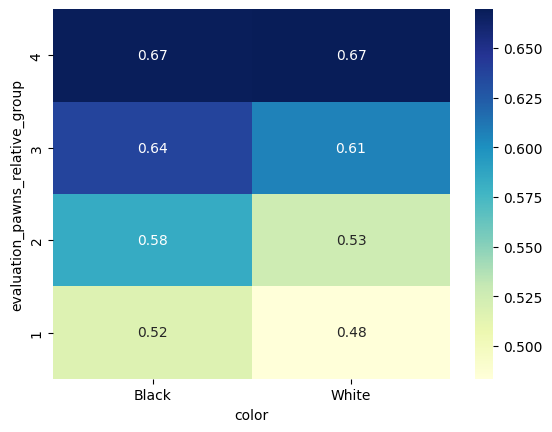

In [29]:
ac_df = adv_cap_df[adv_cap_df['player'] == current_user_name]
ac_pv = ac_df[ac_df['evaluation_pawns_relative_group'] > 0].pivot(index='evaluation_pawns_relative_group', columns='color', values='winrate')
sns.heatmap(ac_pv, annot=True, cmap='YlGnBu')
# inverts yaxis
plt.gca().invert_yaxis()
plt.show()


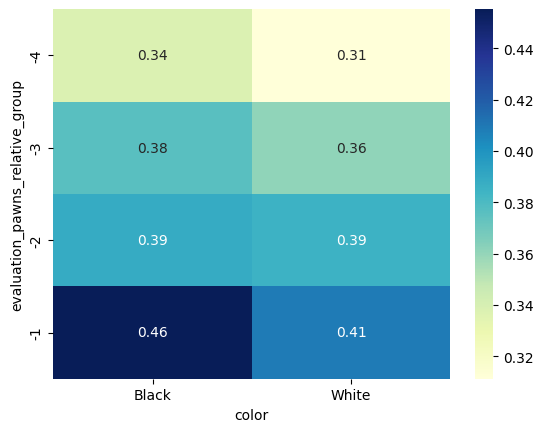

In [31]:
ac_pv = ac_df[ac_df['evaluation_pawns_relative_group'] < 0].pivot(index='evaluation_pawns_relative_group', columns='color', values='winrate')
sns.heatmap(ac_pv, annot=True, cmap='YlGnBu')

plt.show()